Add your import statements and the database connection statements in the below code block

In [20]:
#your code here

import geopandas as gpd
import pysal as ps
import pandas as pd
import numpy as np
import libpysal as lps
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights,examples

### **Question 1**:  
Using the Libpysal Data, create a choropleth path of the United States that depicts the per capita income of each US state in 2009.

**Note:** 
* The Libpysal and GeoPandas libraries both contain utility functions that may make this task easier.
* The choropleth map should have the following parameters:
    - legend
    - Title should be '**Per Capita Income of US States on Choropleth Map**'
    - xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

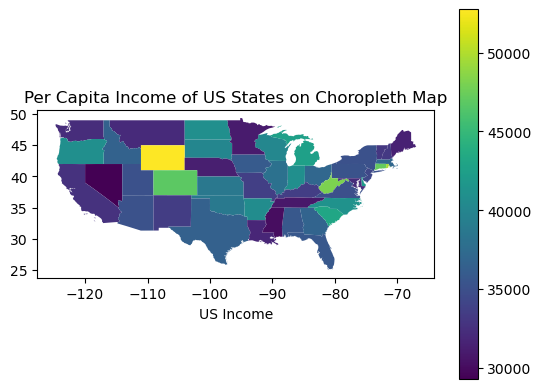

In [21]:
### TEST FUNCTION: test_question1
# DO NOT MODIFY OR REMOVE THE ABOVE LINE
# your code here


# Load the per capita income data
per_capita_data = pd.read_csv(lps.examples.get_path("usjoin.csv"))

# Load the US shapefile
us_plot_df = gpd.read_file(lps.examples.get_path('us48.shx'))

# Add the per capita income data for 2009 to the GeoDataFrame
us_plot_df['per_capita'] = list(per_capita_data["2009"])

# Create the choropleth map
fig, ax = plt.subplots(1, 1)
us_plot_df.plot(column='per_capita', ax=ax, legend=True)

# Set the title and labels
plt.title('Per Capita Income of US States on Choropleth Map')
plt.xlabel('US Income')

# Display the plot
plt.show()



### **Question 2**:
Again using the Libpysal Data, create a proportional symbol map showing a dot at the centroid of each state that is scaled to the per capita income of each US state in 2009.

**Note:** 
* The demonstration notebook for this unit contains code that performs a similar task and may be a useful reference for your assignment.
* The proportional symbol map should have the following parameters:
    * Title should be '**Proportional Symbol Map**'
    * xlabel should be '**US Income**'
* Do not set font size or font-weight for titles and labels and figure size for the plot.

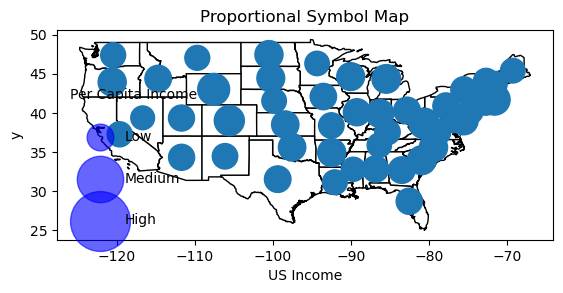

In [22]:
### TEST FUNCTION: test_question2
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here


# Load the per capita income data
per_capita_data = pd.read_csv(lps.examples.get_path("usjoin.csv"))

# Load the US shapefile
us_plot_df = gpd.read_file(lps.examples.get_path('us48.shx'))

# Add the per capita income data for 2009 to the GeoDataFrame
us_plot_df['per_capita'] = list(per_capita_data["2009"])

# Calculate the centroids of each state
us_plot_df['centroid_column'] = us_plot_df.centroid
centroids = list(us_plot_df['centroid_column'])

# Create a DataFrame with the coordinates and per capita income data
final_df = pd.DataFrame({
    'y': [centroids[i].y for i in range(len(centroids))],
    'x': [centroids[i].x for i in range(len(centroids))],
    'data': list(us_plot_df['per_capita'])
})

# Create the base map
base = us_plot_df.plot(color='white', edgecolor='black')

# Create the proportional symbol map
scatter = final_df.plot(kind='scatter', x='x', y='y', s=final_df['data']*0.01, ax=base)

# Set the title and labels
plt.title('Proportional Symbol Map')
plt.xlabel('US Income')

# Create a legend
legend_labels = ['Low', 'Medium', 'High']
legend_sizes = [i*final_df['data'].mean()*0.01 for i in (1, 3, 5)]
for (label, size) in zip(legend_labels, legend_sizes):
    plt.scatter([], [], c='blue', alpha=0.6, s=size, label=label)
plt.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Per Capita Income')

# Display the plot
plt.show()




### **Question 3**:
Using the same data, compute the value of Moran's I for the per capita income of each US state in 2009 using Rook Continuity. Report the value of I rounded to 4 decimal places (i.e. x.XXXX)

**Note:** 
* Use the `esda` library to calculate the Moran's value.
* To calculate Moran’s I, you need two things: the value of interest (y) and a weight matrix (w).
* Print only the calculated Moran's value in the code cell below.
* There should only be one print statement in the below cell.

In [23]:
### TEST FUNCTION: test_question3
# DO NOT MODIFY OR REMOVE THE ABOVE 
# your code here

y = us_plot_df['per_capita']
w = weights.Rook.from_shapefile(examples.get_path("us48.shx"))
moran_stat = esda.Moran(y,w, two_tailed=False)
print (round(moran_stat.I, 4))




0.0407
